In [10]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install mysql-connector-python
!pip install mysql-connector

In [12]:
# Importar librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import pandas as pd
from pandas import DataFrame
import numpy as np
pd.set_option('display.max_columns', None)  # Establece una opción de Pandas para mostrar todas las columnas de un DataFrame.

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("whitegrid")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en Solarize_Lihgt2. 
plt.style.use('Solarize_Light2')

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

import scipy.stats as stats

# -----------------------------------------------------------------------
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import levene

# import mysql.connector
# from mysql.connector import errorcode
# import pymysql


In [13]:
df_data_original =pd.read_csv("DATA.CSV",index_col=0)
df_data_original.head(2).T

,0,1
Age,51,52
Attrition,No,No
BusinessTravel,NaN,NaN
DailyRate,"684,0$","699,0$"
Department,NaN,NaN
DistanceFromHome,6,1
Education,3,4
EducationField,NaN,Life Sciences
employeecount,1,1
employeenumber,"162,0","259,0"


In [14]:
df_data_copy= df_data_original.copy()

In [15]:
df_data_copy.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1


# FASE 1.ANÁLISIS EXPLORATORIO (EDA)

In [16]:
# Análisis realizado en archivo "fase1_eda.ipynb"

# FASE 2. TRANSFORMACIÓN DE DATOS
- 2.0 Homogeneización nombre columnas
- 2.1 Modificar columnas categóricas a numéricas
- 2.2 Homogeneizar las etiquetas de las columnas categóricas
- 2.3 Modificar valores erróneos a nulos
- 2.4 Creación de nuevas columnas
- 2.5 Duplicados
- 2.6 Duplicados employee_number
- 2.7 Nulos
- 2.8 Eliminar columnas
- 2.9 Verificación de categorías
- 2.10 generación de csv "definitivo" tras limpieza de datos

#### 2.0 Homogeneización nombre columnas

In [17]:
nuevas_columnas={columna:columna.lower() for columna in df_data_copy} #modificamos las columnas a minúsculas
df_data_copy.rename(columns= nuevas_columnas, inplace= True) #cambiamos las columnas antiguas por las homogeneizadas en el paso anterior (nuevas_columnas)

In [18]:
df_data_copy.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'sameasmonthlyincome', 'datebirth', 'salary',
       'roledepartament', 'numberchildren', 'remotework'],
      dtype='object')

#### 2.1 Cambiar de strings (objeto) a numéricas

In [19]:
#____STRING A INT_________
#age:               12 valores en letras: cambiarlos a nros + convertir todos los nros a int.
#worklifebalance quitar ",0" y convertir a int.

#____STRING A FLOAT_________
#totalworkingyears: cambiar comas por puntos
#daily rate (comas por puntos y quitarle el símbolo del dolar)
#hourly rate
#monthlyincome
#monthlyrate

In [20]:
#Age:
def texto_nro(cadena):
    cadena = cadena.replace("twenty-six","26").replace("twenty-four","24").replace("thirty-two","32").replace("thirty-six","36").replace("thirty-seven","37").replace("thirty-one","31").replace("thirty","30").replace("forty-seven","47").replace("fifty-two","52").replace("fifty-five","55").replace("fifty-eight","58")
    return int(cadena)

df_data_copy["age"] = df_data_copy["age"].apply(texto_nro)


In [21]:
#employeenumber

In [22]:
df_data_copy["employeenumber"].isnull().sum()

431

In [23]:
df_data_copy["employeenumber"]

0       162,0
1       259,0
2       319,0
3         NaN
4         NaN
        ...  
1609    967,0
1610    972,0
1611      NaN
1612    990,0
1613      NaN
Name: employeenumber, Length: 1614, dtype: object

In [24]:
#Worklifebalance y employeenumber

def nro(cadena):

    try: 
        cadena = cadena.replace(",0","")
        return float(cadena)
    
    except: 
        return np.nan #tiene varios valores que son "nan"

df_data_copy["worklifebalance"] = df_data_copy["worklifebalance"].apply(nro)

In [25]:
df_data_copy["employeenumber"] = df_data_copy["employeenumber"].apply(nro)

In [26]:
#dailyrate 
def daily(nro):
    try:
        return float(nro.replace(",0$",""))
    except:
        return np.nan

df_data_copy["dailyrate"] = df_data_copy["dailyrate"].apply(daily)

In [27]:
# totalworkingyears", "monthlyincome", "monthlyrate: Cambio de string a float

def decimal(cadena):

    try: 
        return float(cadena.replace(",",".").replace("$","."))

    except: 
        return np.nan #tiene varios valores que son "nan"
    
columnas_decimal = ["totalworkingyears", "monthlyincome"]

for columna in columnas_decimal:
    df_data_copy[columna] = df_data_copy[columna].apply(decimal)

In [28]:
# "hourlyrate", "monthlyrate" : cambio de string a float - no tienen decimales

def decimal3(cadena):
    try:
        return float(cadena)
    except:
        return np.nan

col_dec_ent = ["hourlyrate", "monthlyrate"]

for columna in col_dec_ent:
    df_data_copy[columna] = df_data_copy[columna].apply(decimal3)

In [29]:
## Nota: hourlyrate - parecía en el original como si no hubiese nulos pero había algunos que eran "Not available" y q contaban como interger

#### 2.2 Homogeneizar categóricas

In [30]:
#Columnas a homogeneizar sus categorías:
# educationfield (minúsculas)
# jobrole (minúsculas)
# maritalstatus(minúsculas y homogeneización)

def homogeneizar(cadena):
    try:
        return cadena.lower().replace("marreid","married")
    except:
        return np.nan

col_homo = ["educationfield", "jobrole", "maritalstatus"]

for columna in col_homo:
    df_data_copy[columna] = df_data_copy[columna].apply(homogeneizar)

In [31]:
# Homogeneizar "remotework" a 2 opciones: Yes, No
df_data_copy["remotework"] = df_data_copy["remotework"].replace({"True": "Yes", 'False': "No", '0': "No", '1': "Yes"})

In [32]:
len(df_data_copy[df_data_copy["distancefromhome"]<0])

192

#### 2.3 Modificar valores erróneos a nulos

In [33]:
#Distancefromhome - Valores negativos (192 valores) a nulos
def convertir_nulos(numero):
    if numero < 0:
        return np.nan
    else:
        return numero

df_data_copy["distancefromhome"] = df_data_copy["distancefromhome"].apply(convertir_nulos)

In [34]:
#Environmentalsatisfaction: modificar valores diferentes a 1-4 a nulos
def convertir_nulos (numero):
    if numero == 1:
        return numero
    elif numero == 2: 
        return numero
    elif numero == 3:
        return numero
    elif numero == 4:
        return numero
    else:
        return np.nan

#Creación de una columna con la función
df_data_copy["environmentsatisfaction"] = df_data_copy["environmentsatisfaction"].apply(convertir_nulos)

#### 2.4 Creación de nuevas columnas

In [35]:
#1. GÉNERO

#Creamos la función 
def categorizar_gender (numero):
    if numero == 0:
        return 'male'
    else:
        return 'female'

In [36]:
#Creación de una columna con la función
df_data_copy.insert(12, 'gender_cat', df_data_copy["gender"].apply(categorizar_gender))

In [37]:
#2. environmentsatisfaction,relationshipsatisfaction,worklifebalance

def categorizar_environmentsatisfaction(valor):

    if valor == 4:
        return "maximun"
    elif valor == 3:
        return "medium"
    elif valor == 2:
        return "little"
    elif valor == 1:
        return "nothing"
    else:
        return "unknown"

#df_data_copy["environmentsatisfaction_cat"] = df_data_copy["environmentsatisfaction"].apply(categorizar_environmentsatisfaction)
#df_data_copy["relationshipsatisfaction_cat"] = df_data_copy["relationshipsatisfaction"].apply(categorizar_environmentsatisfaction)
#df_data_copy["worklifebalance_cat"] = df_data_copy["worklifebalance"].apply(categorizar_environmentsatisfaction)

In [38]:
df_data_copy.insert(11, 'environmentsatisfaction_cat', df_data_copy["environmentsatisfaction"].apply(categorizar_environmentsatisfaction))

In [39]:
df_data_copy.insert(28, 'relationshipsatisfaction_cat', df_data_copy["relationshipsatisfaction"].apply(categorizar_environmentsatisfaction))

In [40]:
df_data_copy.insert(34, 'worklifebalance_cat', df_data_copy["worklifebalance"].apply(categorizar_environmentsatisfaction))


In [41]:
#education
def categorizar_education(valor):
    if valor == 5:
        return "university"
    elif valor == 3:
        return "college"
    elif valor == 2:
        return "high school"
    elif valor == 1:
        return "middle school"
    else:
        return "Unknown"

In [42]:
df_data_copy.insert(7, 'education_cat', df_data_copy["education"].apply(categorizar_education))

In [43]:
#"jobinvolvement"

def categorizar_jobinvolvement(valor):
    if valor == 4:
        return "very involved"
    elif valor == 3:
        return "involved"
    elif valor == 2:
        return "little involved"
    elif valor == 1:
        return "not involved"
    else:
        return "Unknown"

In [44]:
df_data_copy.insert(17, 'jobinvolvement_cat', df_data_copy["jobinvolvement"].apply(categorizar_jobinvolvement))

In [45]:
mapa = {"No":0, "Yes":1}

df_data_copy["attrition_number"] = df_data_copy["attrition"].map(mapa)

In [46]:
df_data_copy["attrition_number"].value_counts()

0    1355
1     259
Name: attrition_number, dtype: int64

#### 2.5 Duplicados (filas)

In [47]:
#Nro. de duplicados (todas las filas son iguales)
df_data_copy.duplicated().sum()

43

In [48]:
#eliminar duplicados
df_data_copy = df_data_copy.drop_duplicates()
print("Cantidad de filas después de eliminar duplicados:", len(df_data_copy))

Cantidad de filas después de eliminar duplicados: 1571


#### 2.6 Duplicados (employeenumber)
-- Tenemos varios empleados repetidos, borramos el primero (keep=last --> qre decir que mantenemos el primero), ya que asumimos que los primeros registros insertados son más antiguos que los últimos

In [49]:
df_data_copy["employeenumber"].duplicated().sum()

491

In [50]:
df_data_copy.drop_duplicates(subset="employeenumber",keep="last",inplace=True)

In [51]:
df_data_copy.shape

(1080, 48)

#### 2.7 Nulos

In [52]:
#1.CATEGÓRICAS - Ana
# businesstravel
# department - muchos nulos
# education field
# marital status - 119
# overtime
# performancerating - 195 nulos
# Role in department - muchos nulos

In [53]:
#Lsta de columnas categoricas con nulos
nulos_esta_cat = df_data_copy[df_data_copy.columns[df_data_copy.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['businesstravel', 'department', 'educationfield', 'maritalstatus',
       'over18', 'overtime', 'performancerating', 'standardhours',
       'yearsincurrentrole', 'sameasmonthlyincome', 'roledepartament'],
      dtype='object')


In [54]:
df_data_copy.isnull().sum()

age                                0
attrition                          0
businesstravel                   535
dailyrate                         85
department                       873
distancefromhome                 125
education                          0
education_cat                      0
educationfield                   496
employeecount                      0
employeenumber                     1
environmentsatisfaction           66
environmentsatisfaction_cat        0
gender                             0
gender_cat                         0
hourlyrate                        62
jobinvolvement                     0
jobinvolvement_cat                 0
joblevel                           0
jobrole                            0
jobsatisfaction                    0
maritalstatus                    426
monthlyincome                    560
monthlyrate                        0
numcompaniesworked                 0
over18                           606
overtime                         447
p

In [55]:
# El 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df_data_copy[col].value_counts() / df_data_copy.shape[0])
    print("........................")

La distribución de las categorías para la columna BUSINESSTRAVEL


travel_rarely        0.347222
travel_frequently    0.101852
non-travel           0.055556
Name: businesstravel, dtype: float64

........................
La distribución de las categorías para la columna DEPARTMENT


 Research & Development     0.127778
 Sales                      0.056481
 Human Resources            0.007407
Name: department, dtype: float64

........................
La distribución de las categorías para la columna EDUCATIONFIELD


life sciences       0.220370
medical             0.163889
marketing           0.071296
technical degree    0.044444
other               0.035185
human resources     0.005556
Name: educationfield, dtype: float64

........................
La distribución de las categorías para la columna MARITALSTATUS


married     0.266667
single      0.216667
divorced    0.122222
Name: maritalstatus, dtype: float64

........................
La distribución de las categorías para la columna OVER18


Y    0.438889
Name: over18, dtype: float64

........................
La distribución de las categorías para la columna OVERTIME


No     0.415741
Yes    0.170370
Name: overtime, dtype: float64

........................
La distribución de las categorías para la columna PERFORMANCERATING


3,0    0.739815
4,0    0.133333
Name: performancerating, dtype: float64

........................
La distribución de las categorías para la columna STANDARDHOURS


80,0    0.260185
Name: standardhours, dtype: float64

........................
La distribución de las categorías para la columna YEARSINCURRENTROLE


2,0     0.006481
7,0     0.002778
0,0     0.002778
6,0     0.001852
4,0     0.001852
3,0     0.001852
1,0     0.001852
12,0    0.000926
11,0    0.000926
Name: yearsincurrentrole, dtype: float64

........................
La distribución de las categorías para la columna SAMEASMONTHLYINCOME


2258,0     0.001852
6162,0     0.001852
2377,0     0.001852
2587,0     0.001852
3420,0     0.001852
             ...   
3102,0     0.000926
6380,0     0.000926
6349,0     0.000926
6502,0     0.000926
10845,0    0.000926
Name: sameasmonthlyincome, Length: 508, dtype: float64

........................
La distribución de las categorías para la columna ROLEDEPARTAMENT


 MaNAgeR  -  Sales                                        0.001852
 ManaGER  -  Research & Development                       0.000926
 hEalthCaRe reprEseNTaTiVe  -  Research & Development     0.000926
 reseARCh SCieNTisT  -  Research & Development            0.000926
 reSEarcH scIENtISt  -  Research & Development            0.000926
                                                            ...   
 SaLes exECutIVe  -  Sales                                0.000926
 manAGER  -  Sales                                        0.000926
 LaBOrATORy teCHnIciaN  -  Research & Development         0.000926
 SAlES ExecuTIVe  -  Sales                                0.000926
 sAleS EXECUtIvE  -  Sales                                0.000926
Name: roledepartament, Length: 206, dtype: float64

........................


Performance rating es la única que tendría posibilidades de cambiar a la moda, las otras tienen valores muy bajos y seria convenientes cmabiar por desconocido. 

In [56]:
#columnas_moda = ['performancerating']
columnas_desconocido = ['businesstravel', 'department', 'educationfield','maritalstatus','overtime']

In [57]:
#Columna moda
# for columna in columnas_moda:
#     moda = df_data_copy[col].mode()[0]    
#     df_data_copy[columna] = df_data_copy[columna].fillna(moda)

# print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
# df_data_copy[columnas_moda].isnull().sum()

In [58]:
#columna desconocido
for columna in columnas_desconocido:
    df_data_copy[columna] = df_data_copy[columna].fillna("Unknown") 

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df_data_copy[columnas_desconocido].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


businesstravel    0
department        0
educationfield    0
maritalstatus     0
overtime          0
dtype: int64

In [59]:
#2.NUMÉRICAS - Elena
# hourly_rate = 84 nulos
# Environmental satisfaction 
# monthlyincome
# worklifebalance - 108
# totalworkingyears
# numberofchildren

In [60]:
#Columnas numéricas con nulos 
nulos_num = df_data_copy[df_data_copy.columns[df_data_copy.isnull().any()]].select_dtypes(include = np.number).columns
print(nulos_num)

Index(['dailyrate', 'distancefromhome', 'employeenumber',
       'environmentsatisfaction', 'hourlyrate', 'monthlyincome',
       'totalworkingyears', 'worklifebalance', 'numberchildren'],
      dtype='object')


In [61]:
#% de nulos en las columnas numéricas con nulos
nl = (df_data_copy[nulos_num].isnull().sum() / df_data_copy.shape[0]) * 100
#nl.sort_values(ascending=False).reset_index()
nl.reset_index()

,index,0
0,dailyrate,7.870370
1,distancefromhome,11.574074
2,employeenumber,0.092593
3,environmentsatisfaction,6.111111
4,hourlyrate,5.740741
5,monthlyincome,51.851852
6,totalworkingyears,33.333333
7,worklifebalance,6.296296
8,numberchildren,100.000000


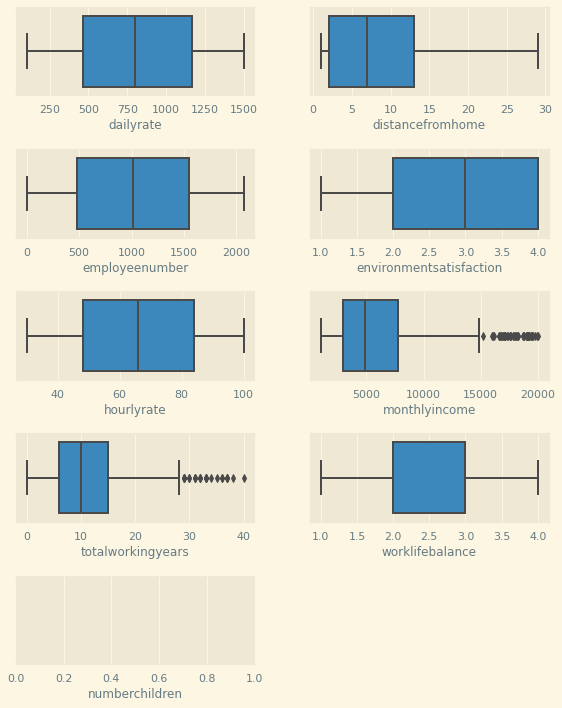

In [62]:
#Valores atípicos
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (8,10)) 
axes = axes.flat

for indice, col in enumerate(nulos_num):
    sns.boxplot(x = col, data = df_data_copy, ax = axes[indice])
    plt.xlabel(col)  

plt.tight_layout()
fig.delaxes(axes[-1])
plt.show();

#### Decisiones: Nulos (numéricas)
- Number of children: borrarla
- Monthly income: borrarla. Tiene 52% de nulos
- Todas las demás: utilizar el iterate y knn imputer - atípicos en totalworkingyears

In [63]:
#ITERATIVE IMPUTER

imputer_iterative = IterativeImputer(max_iter =20, random_state=42)
imputer_iterative_imputado = imputer_iterative.fit_transform(df_data_copy[['environmentsatisfaction', 'hourlyrate','totalworkingyears', 'worklifebalance']])
imputer_iterative_imputado

array([[ 1.        , 51.        , 11.2819727 ,  3.        ],
       [ 3.        , 65.        , 34.        ,  3.        ],
       [ 3.        , 58.        , 22.        ,  2.76050668],
       ...,
       [ 3.        , 93.        ,  8.        ,  4.        ],
       [ 3.        , 57.        , 11.26978057,  2.        ],
       [ 4.        , 75.        , 11.23244313,  3.        ]])

In [64]:
df_data_copy[['environmentsatisfaction_iterativo', 'hourlyrate_iterativo', 'totalworkingyears_iterativo', 'worklifebalance_iterativo']] = imputer_iterative_imputado

In [65]:
#KNN IMPUTER
imputer_knn = KNNImputer(n_neighbors=5)
imputer_knn_imputado = imputer_knn.fit_transform(df_data_copy[['environmentsatisfaction', 'hourlyrate', 'totalworkingyears', 'worklifebalance']])
imputer_knn_imputado

array([[ 1. , 51. ,  8. ,  3. ],
       [ 3. , 65. , 34. ,  3. ],
       [ 3. , 58. , 22. ,  3.4],
       ...,
       [ 3. , 93. ,  8. ,  4. ],
       [ 3. , 57. ,  5.4,  2. ],
       [ 4. , 75. , 11.6,  3. ]])

In [66]:
df_data_copy[['environmentsatisfaction_knn', 'hourlyrate_knn', 'totalworkingyears_knn', 'worklifebalance_knn']] = imputer_knn_imputado

In [67]:
#Comparamos las estadísticas generadas de por el iterative y el knn para decidir cuál coger (aquel cuya media y mediana sea más parecida a la original- En la columna con valores atípicos cogemos aquel cuya mediana sea más parecida a la original)
df_data_copy.describe()[['environmentsatisfaction', 'environmentsatisfaction_iterativo', 'environmentsatisfaction_knn', 'hourlyrate', 'hourlyrate_iterativo', 'hourlyrate_knn', 'totalworkingyears', 'totalworkingyears_iterativo', 'totalworkingyears_knn', 'worklifebalance', 'worklifebalance_iterativo', 'worklifebalance_knn']].T

,count,mean,std,min,25%,50%,75%,max
environmentsatisfaction,1014.0,2.723866,1.098632,1.0,2.0,3.000000,4.000000,4.0
environmentsatisfaction_iterativo,1080.0,2.723781,1.064690,1.0,2.0,3.000000,4.000000,4.0
environmentsatisfaction_knn,1080.0,2.738148,1.073926,1.0,2.0,3.000000,4.000000,4.0
hourlyrate,1018.0,66.013752,20.340074,30.0,48.0,66.000000,84.000000,100.0
hourlyrate_iterativo,1080.0,66.000678,19.749606,30.0,50.0,66.000000,83.000000,100.0
hourlyrate_knn,1080.0,65.997222,19.857465,30.0,49.0,66.000000,83.000000,100.0
totalworkingyears,720.0,11.250000,7.567499,0.0,6.0,10.000000,15.000000,40.0
totalworkingyears_iterativo,1080.0,11.251012,6.177447,0.0,8.0,11.216703,11.319691,40.0
totalworkingyears_knn,1080.0,10.804259,6.441342,0.0,6.6,10.000000,13.000000,40.0
worklifebalance,1012.0,2.766798,0.701111,1.0,2.0,3.000000,3.000000,4.0


### Cuál coger?
- env.satif_iterativo
- hourlyrate_iterativo
- totalworkingyears_iterativo
- worklifebalance_iterativo

In [68]:
#Quitamos las columnas originales y las de aquellos métodos q están más alejados de la media y medianas de las originales
df_data_copy.drop(['environmentsatisfaction', 'environmentsatisfaction_knn', 'hourlyrate', 'hourlyrate_knn', 'totalworkingyears', 'totalworkingyears_knn', 'worklifebalance', 'worklifebalance_knn'], axis = 1, inplace = True)

In [69]:
nuevas_columnas = {'age': 'age', 'attrition': 'attrition', 'businesstravel': 'businesstravel', 
                    'dailyrate': 'dailyrate', 'department': 'department', 
                    'distancefromhome': 'distancefromhome', 'education': 'education', 
                    'education_cat': 'education_cat', 'educationfield': 'educationfield', 
                    'employeecount': 'employeecount', 'employeenumber': 'employeenumber', 
                    'environmentsatisfaction_cat': 'environmentsatisfaction_cat', 'gender': 'gender', 
                    'gender_cat': 'gender_cat', 'jobinvolvement': 'jobinvolvement', 
                    'jobinvolvement_cat': 'jobinvolvement_cat', 'joblevel': 'joblevel', 
                    'jobrole': 'jobrole', 'jobsatisfaction': 'jobsatisfaction', 
                    'maritalstatus': 'maritalstatus', 'monthlyrate': 'monthlyrate', 
                    'numcompaniesworked': 'numcompaniesworked', 'over18': 'over18', 
                    'overtime': 'overtime', 'percentsalaryhike': 'percentsalaryhike', 
                    'performancerating': 'performancerating', 
                    'relationshipsatisfaction': 'relationshipsatisfaction', 
                    'relationshipsatisfaction_cat': 'relationshipsatisfaction_cat', 
                    'standardhours': 'standardhours', 'stockoptionlevel': 'stockoptionlevel', 
                    'trainingtimeslastyear': 'trainingtimeslastyear', 
                    'worklifebalance_cat': 'worklifebalance_cat', 'yearsatcompany': 'yearsatcompany', 
                    'yearsincurrentrole': 'yearsincurrentrole', 
                    'yearssincelastpromotion': 'yearssincelastpromotion', 
                    'yearswithcurrmanager': 'yearswithcurrmanager', 
                    'sameasmonthlyincome': 'sameasmonthlyincome', 
                    'datebirth': 'datebirth', 'salary': 'salary', 
                    'roledepartament': 'roledepartament', 'numberchildren': 'numberchildren', 
                    'remotework': 'remotework', 
                    'environmentsatisfaction_iterativo': 'environmentsatisfaction', 
                    'hourlyrate_iterativo': 'hourlyrate', 
                    'totalworkingyears_iterativo': 'totalworkingyears', 
                    'worklifebalance_iterativo': 'worklifebalance'}

In [70]:
df_data_copy.rename(columns = nuevas_columnas, inplace = True)

In [71]:
#NOTA: Para crear las columnas de iterativo y de knn automáticamente

#---------------ITERATIVE-----------------------------------
# palabras = ['environmentsatisfaction', 'hourlyrate', 'monthlyincome',
#        'totalworkingyears', 'worklifebalance', 'numberchildren']

# palabras_iterativas = [palabra + '_iterativo' for palabra in palabras]

# print(palabras_iterativas)

# #---------------KNN-----------------------------------

# palabras2 = ['environmentsatisfaction', 'hourlyrate', 'monthlyincome',
#        'totalworkingyears', 'worklifebalance', 'numberchildren']

# palabras_iterativas = [palabra + '_knn' for palabra in palabras2]

# print(palabras_iterativas)

# #---------------TODAS JUNTAS-----------------------------------

# pal = ['environmentsatisfaction', 'hourlyrate', 'monthlyincome',
#        'totalworkingyears', 'worklifebalance', 'numberchildren']

# pal2 = ['environmentsatisfaction_iterativo', 'hourlyrate_iterativo', 'monthlyincome_iterativo', 'totalworkingyears_iterativo', 'worklifebalance_iterativo', 'numberchildren_iterativo']


# pal3 = ['environmentsatisfaction_knn', 'hourlyrate_knn', 'monthlyincome_knn', 'totalworkingyears_knn', 'worklifebalance_knn', 'numberchildren_knn']


# lista_concatenada = [item for sublist in zip(pal, pal2, pal3) for item in sublist]

# print(lista_concatenada)

#### 2.8 Eliminar columnas

In [72]:
# -Numberofchildren
# - over18
# - datebirth - No aporta nada nuevo ya que tenemos una columna con la edad
# - salary - sólo un valor para todos
# - sameasmontlyincome - copia de columna "monthly income"
# - monthlyincome - muchos nulos 52%
# - standardhours
# - employeecount
# - roledepartment
# - performancerating
# - years in currentrole

In [73]:
columnas_drop = ["numberchildren", "over18","datebirth","salary","sameasmonthlyincome", "monthlyincome","standardhours","employeecount", "performancerating", "yearsincurrentrole", "roledepartament"]

In [74]:
df_data_copy.drop(columns = columnas_drop, axis=1, inplace=True)

In [75]:
df_data_copy.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'education_cat', 'educationfield',
       'employeenumber', 'environmentsatisfaction_cat', 'gender', 'gender_cat',
       'jobinvolvement', 'jobinvolvement_cat', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyrate', 'numcompaniesworked',
       'overtime', 'percentsalaryhike', 'relationshipsatisfaction',
       'relationshipsatisfaction_cat', 'stockoptionlevel',
       'trainingtimeslastyear', 'worklifebalance_cat', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'remotework',
       'attrition_number', 'environmentsatisfaction', 'hourlyrate',
       'totalworkingyears', 'worklifebalance'],
      dtype='object')

#### 2.9 Verificación de clasificaciones categóricas
- education (1 menos y 5 más educación)
    Parece que es así pero hay personas con un nivel "1" de educación que son directores y managers y tb 1 q tienenn altos "hourlyrates"

- jobinvolvement (1 menos y 4 máximo) -  a priori
    No puedo determinarlo, no parece q esté unico a jobsatisfaction

- jobsatisfaction (1 mínimo y 4 máximo) - a priori
    No puedo determinarlo, no parece q esté unico a jobsatisfaction

- joblevel (1 mínimo y 5 máximo) - a priori
    Sí, el 1 son técnicos el 5 son managers, directores

- relationshiptsatisfaction (1 mínimo y 4 máximo) - a priori
    No guarda una relación directa con otras columnas

- stockoption (0 sin opciones y 1-3 de pocas acciones a muchas) - a priori
No guarda una relación directa con otras columnas. Hay empleados q llevan 0 años trabjando y tienen el nivel 3 de opciones. y tampoco por el tipo de posición hay relación

- workinglifebalance (1 mínimo -4 máximo) -a prioru
tampoco existe relación directa con otras columnas

In [76]:
#relationshipsatisfaction

In [77]:
#df_data_copy[["education","educationfield","age","joblevel","jobrole", "hourlyrate","monthlyrate","yearsatcompany"]].sort_values(by = "hourlyrate", ascending=False).head(50)

In [78]:
#df_data_copy[["jobinvolvement","environmentsatisfaction","jobsatisfaction"]].sort_values(by = "jobinvolvement", ascending=False).tail(50)

In [79]:
#df_data_copy[["joblevel","jobrole", "hourlyrate","monthlyrate","yearsatcompany","education","educationfield","age"]].sort_values(by = "joblevel", ascending=False).head(50)

In [80]:
#df_data_copy[["jobinvolvement","environmentsatisfaction","jobsatisfaction"]].sort_values(by = "jobsatisfaction", ascending=False).tail(50)

In [81]:
#df_data_copy[["jobinvolvement","environmentsatisfaction","jobsatisfaction", "relationshipsatisfaction"]].sort_values(by = "relationshipsatisfaction", ascending=False).head(50)

In [82]:
#df_data_copy[["stockoptionlevel", "yearsatcompany","totalworkingyears","joblevel","jobrole"]].sort_values(by = "stockoptionlevel", ascending=False).head(50)

In [83]:
#df_data_copy[["worklifebalance","jobinvolvement","environmentsatisfaction","jobsatisfaction", "relationshipsatisfaction"]].sort_values(by = "worklifebalance", ascending=False).head(50)

2.10. Generación de csv

In [84]:
df_data_copy.to_csv("definitivo.csv")

In [85]:
definitivo = pd.read_csv("definitivo.csv", index_col = 0)

In [86]:
definitivo.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'education_cat', 'educationfield',
       'employeenumber', 'environmentsatisfaction_cat', 'gender', 'gender_cat',
       'jobinvolvement', 'jobinvolvement_cat', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyrate', 'numcompaniesworked',
       'overtime', 'percentsalaryhike', 'relationshipsatisfaction',
       'relationshipsatisfaction_cat', 'stockoptionlevel',
       'trainingtimeslastyear', 'worklifebalance_cat', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'remotework',
       'attrition_number', 'environmentsatisfaction', 'hourlyrate',
       'totalworkingyears', 'worklifebalance'],
      dtype='object')

# FASE 3. INSERCIÓN DE DATOS

In [87]:
definitivo.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'education_cat', 'educationfield',
       'employeenumber', 'environmentsatisfaction_cat', 'gender', 'gender_cat',
       'jobinvolvement', 'jobinvolvement_cat', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyrate', 'numcompaniesworked',
       'overtime', 'percentsalaryhike', 'relationshipsatisfaction',
       'relationshipsatisfaction_cat', 'stockoptionlevel',
       'trainingtimeslastyear', 'worklifebalance_cat', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'remotework',
       'attrition_number', 'environmentsatisfaction', 'hourlyrate',
       'totalworkingyears', 'worklifebalance'],
      dtype='object')

In [88]:
df_abandono = definitivo[['attrition', 'environmentsatisfaction', 'environmentsatisfaction_cat', 'jobinvolvement', 'jobinvolvement_cat', 'jobsatisfaction','relationshipsatisfaction', 'relationshipsatisfaction_cat', 'worklifebalance', 'worklifebalance_cat', 'employeenumber']]
df_abandono

,attrition,environmentsatisfaction,environmentsatisfaction_cat,jobinvolvement,jobinvolvement_cat,jobsatisfaction,relationshipsatisfaction,relationshipsatisfaction_cat,worklifebalance,worklifebalance_cat,employeenumber
0,No,1.0,nothing,3,involved,3,3,medium,3.000000,medium,162.0
1,No,3.0,medium,2,little involved,3,1,nothing,3.000000,medium,259.0
2,No,3.0,medium,3,involved,4,4,maximun,2.760507,unknown,319.0
5,No,4.0,maximun,3,involved,4,2,little,3.000000,medium,1900.0
6,No,1.0,nothing,3,involved,1,4,maximun,2.000000,little,81.0
...,...,...,...,...,...,...,...,...,...,...,...
1605,No,2.0,little,2,little involved,3,2,little,4.000000,maximun,941.0
1606,No,3.0,medium,2,little involved,1,2,little,3.000000,medium,956.0
1608,No,3.0,medium,3,involved,1,3,medium,4.000000,maximun,966.0
1610,No,3.0,medium,3,involved,2,2,little,2.000000,little,972.0


In [89]:
lista_tuplas_abandono = [tuple(x) for x in df_abandono.values]
lista_tuplas_abandono

[('No', 1.0, 'nothing', 3, 'involved', 3, 3, 'medium', 3.0, 'medium', 162.0),
 ('No',
  3.0,
  'medium',
  2,
  'little involved',
  3,
  1,
  'nothing',
  3.0,
  'medium',
  259.0),
 ('No',
  3.0,
  'medium',
  3,
  'involved',
  4,
  4,
  'maximun',
  2.7605066804848613,
  'unknown',
  319.0),
 ('No', 4.0, 'maximun', 3, 'involved', 4, 2, 'little', 3.0, 'medium', 1900.0),
 ('No', 1.0, 'nothing', 3, 'involved', 1, 4, 'maximun', 2.0, 'little', 81.0),
 ('No', 2.0, 'little', 3, 'involved', 3, 3, 'medium', 3.0, 'medium', 387.0),
 ('No', 1.0, 'nothing', 3, 'involved', 3, 2, 'little', 4.0, 'maximun', 999.0),
 ('No',
  2.0,
  'little',
  1,
  'not involved',
  3,
  2,
  'little',
  3.0,
  'medium',
  1035.0),
 ('Yes', 2.0, 'little', 3, 'involved', 3, 4, 'maximun', 3.0, 'medium', 58.0),
 ('No', 3.0, 'medium', 3, 'involved', 3, 4, 'maximun', 3.0, 'medium', 558.0),
 ('Yes', 4.0, 'maximun', 3, 'involved', 2, 4, 'maximun', 3.0, 'medium', 825.0),
 ('No',
  3.0,
  'medium',
  2,
  'little involved',

In [90]:
# cnx = mysql.connector.connect(user = "root",
#                               password = "AlumnaAdalab",
#                               host = "127.0.0.1",
#                               database = "mydb")#Nuesta base de datos de mysql
# #Nos permite enviar informacion atraves de la conexciosm
# mycursor = cnx.cursor()


# #Escribimos la query aqui
# #¡¡¡El ORDEN IMPORTA!!! --> El primer dato debe ser el primer elemento de la lista de tuplas
# sql_proyecto = "INSERT INTO abandono_satisfaccion (attrition, environmentsatisfaction, environmentsatisfaction_cat, jobinvolvement, jobinvolvement_cat, jobsatisfaction, relationshipsatisfaction, relationshipsatisfaction_cat, worklifebalance, worklifebalance_cat, employeenumber) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"

#                         #peliculas el nombre del archivo correspondiente
# try:
#     mycursor.executemany(sql_proyecto, lista_tuplas_abandono)
#     cnx.commit()
#     print(mycursor.rowcount,"registros insertados")
# except:
#     print("Ha habido un error en la inserción")

In [91]:
df_salario = definitivo[['dailyrate', 'monthlyrate', 'percentsalaryhike', 'hourlyrate', 'employeenumber']]
df_salario

,dailyrate,monthlyrate,percentsalaryhike,hourlyrate,employeenumber
0,684.0,6462.0,13,51.000000,162.0
1,699.0,5678.0,14,65.000000,259.0
2,532.0,4933.0,11,58.000000,319.0
5,117.0,2437.0,11,58.000000,1900.0
6,1435.0,2354.0,11,99.000000,81.0
...,...,...,...,...,...
1605,154.0,11737.0,15,66.985591,941.0
1606,1283.0,11148.0,12,52.000000,956.0
1608,498.0,13554.0,12,93.000000,966.0
1610,805.0,23163.0,12,57.000000,972.0


# FASE 4. AB Testing

#### Establecer hipótesis
- H0: No existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa

#### Grupos
- Control: Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5
- Variante: Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala

### Métrica
- Attrition -- No: empleado no ha dejado la empresa; Yes: empleado ha dejado la empresa

In [92]:
#Paso1. Divide a los empleados en los grupos A y B según los criterios establecidos

df_control = definitivo[definitivo["jobsatisfaction"] >= 3]
df_variante = definitivo[definitivo["jobsatisfaction"] < 3]
print(len(df_control))
print(len(df_variante))


665
415


In [93]:
# Paso2. Cálculo de la tasa de rotación

# Tasa de rotación en grupo de control
df_control_rotacion = df_control[df_control["attrition"] == "Yes"]
tasa_rotacion_control = df_control_rotacion.shape[0] / df_control.shape[0]
print(f"la tasa de rotación del grupo de control es:{tasa_rotacion_control}")

# Tasa de rotación en grupo variante
df_variante_rotacion = df_variante[df_variante["attrition"] == "Yes"]
tasa_rotacion_variante = df_variante_rotacion.shape[0] / df_variante.shape[0]
print(f"la tasa de rotación del grupo variante es:{tasa_rotacion_variante}")

la tasa de rotación del grupo de control es:0.14135338345864662
la tasa de rotación del grupo variante es:0.2


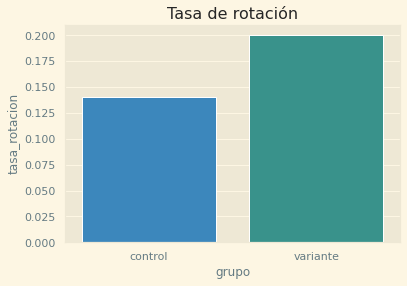

In [94]:
# Gráfico para visualizar la diferencia en la tasa de rotación

# 1. De las tasas de conversión, creo un dataframe
rota = {"grupo":["control", "variante"], "tasa_rotacion": [0.14, 0.2]}
df_rotacion = pd.DataFrame(rota)

#2. Gráfica deacuerdo al df_rotacion
sns.barplot(x="grupo", y="tasa_rotacion", data=df_rotacion)
plt.title("Tasa de rotación");

In [123]:
#Creamos una columna con la división de los grupos por satisfacción
definitivo["group"] = np.where(definitivo["jobsatisfaction"] >= 3, "control", "variante")

Interpretación: La tasa de rotación es mayor en el grupo variante (aquellos con un nivel de satisfacción bajo = 1 ó 2)

In [125]:
#Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.

#1. Creamos una columna con la división de los grupos por satisfacción
definitivo["group"] = np.where(definitivo["jobsatisfaction"] >= 3, "control", "variante")

#2. Tabla de contingencia
contingency_table = pd.crosstab(definitivo["group"], definitivo['attrition'])

#3.Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(p_value)

#4. Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa en la tasa de rotación de ambos grupos.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que si que existe una diferencia entre los grupos 
          """)
else:
    print("No hay evidencia de una diferencia significativa en la tasa de rotación de ambos grupos.")
    print("\n ---------- \n")
    print(""" 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas
          """)

0.014362771751750169
Hay una diferencia significativa en la tasa de rotación de ambos grupos.

 ---------- 


          Los resultados sugieren que si que existe una diferencia entre los grupos 
          


In [127]:
#contingency_table

In [97]:
# Paso 5. Calcular la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.

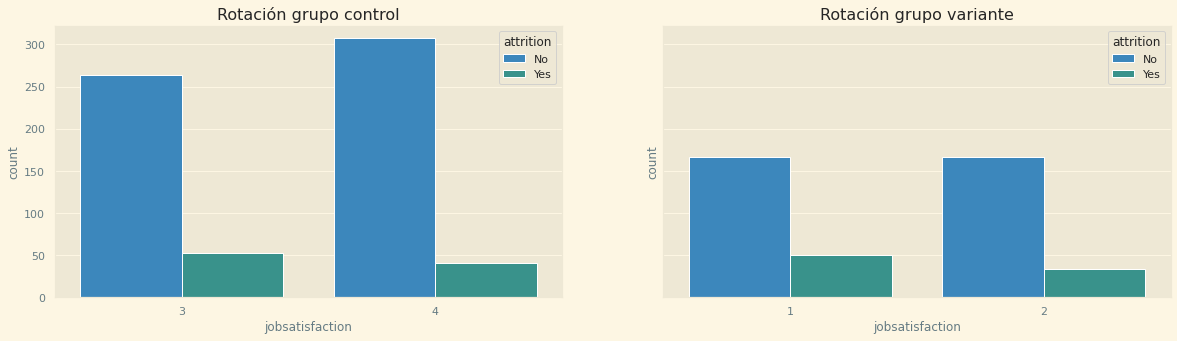

In [98]:
# REPRESENTACIÓN VISUAL
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5),sharey=True)

#---Opción1------

# Gráfico 1: Rotación del grupo control
sns.countplot(x="jobsatisfaction", hue="attrition", data=df_control, ax=axes[0])
axes[0].set_title("Rotación grupo control")

# Gráfico 2: Rotación del grupo variante
sns.countplot(x="jobsatisfaction", hue="attrition", data=df_variante, ax=axes[1])
axes[1].set_title("Rotación grupo variante");


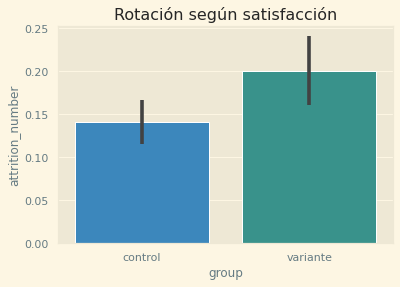

In [99]:
# ----- OPCIÓN 2 -----
#Gráfico 2 para mejor visualización entre ambos grupos

# Para q se vea mejor la diferencia entre el grupo de control y media, creamos una columna (es lo mismo que el filtrado hecho anteriormente entre grupo de control y variante pero esta vez en una nueva columna
definitivo["group"].value_counts()
sns.barplot(x="group", y="attrition_number", data=definitivo)
plt.title("Rotación según satisfacción");

Interpretación de los gráficos: Visualmente, la rotación es mayor en el grupo variante (aquellos con un nivel de satisfacción más bajo (1 y 2)) q en el control (donde el nivel de satisfacción es más alto (3 y 4))

In [100]:
definitivo.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'education_cat', 'educationfield',
       'employeenumber', 'environmentsatisfaction_cat', 'gender', 'gender_cat',
       'jobinvolvement', 'jobinvolvement_cat', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyrate', 'numcompaniesworked',
       'overtime', 'percentsalaryhike', 'relationshipsatisfaction',
       'relationshipsatisfaction_cat', 'stockoptionlevel',
       'trainingtimeslastyear', 'worklifebalance_cat', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'remotework',
       'attrition_number', 'environmentsatisfaction', 'hourlyrate',
       'totalworkingyears', 'worklifebalance', 'group'],
      dtype='object')

In [101]:
# Análisis estadístico para calcular la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo
#--> Verificamos: Normalidad; Homogeneidad de Varianzas e Independencia

In [102]:
#A. NORMALIDAD (con Shapiro)

def normalidad(dataframe, columna):
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

normalidad(definitivo, "attrition_number")

Para la columna attrition_number los datos no siguen una distribución normal.


In [103]:
#Puesto que nuestra métrica (attrition) no sigue una distribución normal, hacemos la prueba de ManWhitney 

#1. Filtramos el conjunto de datos para quedarnos con la métrica q queremos valorar
rotacion_control = df_control["attrition_number"]
rotacion_variante = df_variante["attrition_number"]
print(len(rotacion_control))
print(len(rotacion_variante))

#2. Realizamos la prueba de ManWhitney para calcular el pvalor
statistic, pvalue = mannwhitneyu(rotacion_control, rotacion_variante)
print(f"El pvalor de rotación es {pvalue}") 

if pvalue < 0.05:
    print("Para la métrica rotación, las medias son diferentes.")
else:
    print("Para la métrica rotación, las medias son iguales.")

665
415
El pvalor de rotación es 0.011366403739309406
Para la métrica rotación, las medias son diferentes.


Interpretación del pvalor: Puesto que este pvalor es inferior a 0.05 podemos afirmar que existe una diferencia significativa entre las medias y por tanto podemos rechazar la hipótesis nula de que no existe una relación entre la rotación y el nivel de satisfacción. 
Conclusión: Existe una relación significativa entre el nivel de satisfacción y el abandono. 

In [104]:
definitivo.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'education_cat', 'educationfield',
       'employeenumber', 'environmentsatisfaction_cat', 'gender', 'gender_cat',
       'jobinvolvement', 'jobinvolvement_cat', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyrate', 'numcompaniesworked',
       'overtime', 'percentsalaryhike', 'relationshipsatisfaction',
       'relationshipsatisfaction_cat', 'stockoptionlevel',
       'trainingtimeslastyear', 'worklifebalance_cat', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'remotework',
       'attrition_number', 'environmentsatisfaction', 'hourlyrate',
       'totalworkingyears', 'worklifebalance', 'group'],
      dtype='object')

In [111]:
df_control.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,education_cat,educationfield,employeenumber,environmentsatisfaction_cat,gender,gender_cat,jobinvolvement,jobinvolvement_cat,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,relationshipsatisfaction,relationshipsatisfaction_cat,stockoptionlevel,trainingtimeslastyear,worklifebalance_cat,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,remotework,attrition_number,environmentsatisfaction,hourlyrate,totalworkingyears,worklifebalance
0,51,No,Unknown,684.0,Unknown,6.0,3,college,Unknown,162.0,nothing,0,male,3,involved,5,research director,3,Unknown,6462.0,7,No,13,3,medium,0,5,medium,20,15,15,Yes,0,1.0,51.0,11.281973,3.000000
1,52,No,Unknown,699.0,Unknown,1.0,4,Unknown,life sciences,259.0,medium,0,male,2,little involved,5,manager,3,Unknown,5678.0,0,Unknown,14,1,nothing,1,5,medium,33,11,9,Yes,0,3.0,65.0,34.000000,3.000000
2,42,No,travel_rarely,532.0,Research & Development,4.0,2,high school,technical degree,319.0,medium,0,male,3,involved,5,manager,4,married,4933.0,1,No,11,4,maximun,0,3,unknown,22,11,15,Yes,0,3.0,58.0,22.000000,2.760507
5,48,No,Unknown,117.0,Research & Development,22.0,3,college,medical,1900.0,maximun,1,female,3,involved,4,manager,4,Unknown,2437.0,3,No,11,2,little,1,3,medium,22,4,7,Yes,0,4.0,58.0,11.267755,3.000000
7,42,No,travel_rarely,635.0,Unknown,1.0,1,middle school,Unknown,387.0,little,0,male,3,involved,2,sales executive,3,married,24532.0,1,No,25,3,medium,0,3,medium,20,11,6,No,0,2.0,99.0,20.000000,3.000000


<AxesSubplot:xlabel='jobsatisfaction', ylabel='attrition_number'>

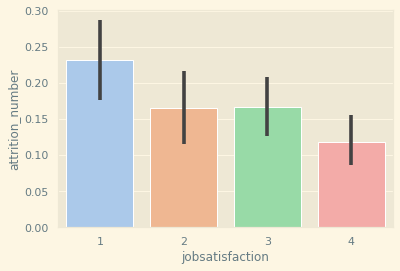

In [128]:
sns.barplot(x ="jobsatisfaction", y = "attrition_number", data = definitivo, palette = "pastel")

In [117]:
definitivo.groupby("jobsatisfaction")["attrition_number"].mean()

jobsatisfaction
1    0.231481
2    0.165829
3    0.167192
4    0.117816
Name: attrition_number, dtype: float64

In [129]:
# sns.regplot(x ="jobsatisfaction", y = "attrition_number", data = definitivo)
# # Establecer límites en el eje y para acortar el rango de valores
# plt.ylim(0, 0.3)
# plt.title("Relación entre satisfacción laboral y abandono para ambos grupos");

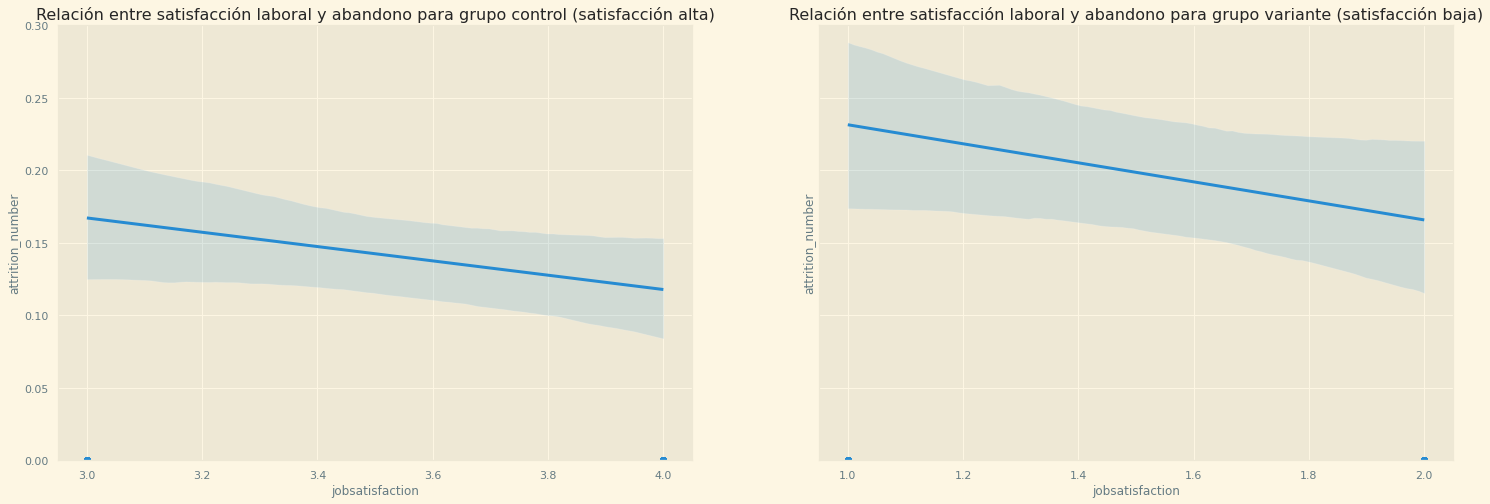

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 8),sharey=True)

sns.regplot(x ="jobsatisfaction", y = "attrition_number", data = df_control, ax=axes[0])
plt.ylim(0, 0.3)
axes[0].set_title("Relación entre satisfacción laboral y abandono para grupo control (satisfacción alta)");

sns.regplot(x ="jobsatisfaction", y = "attrition_number", data = df_variante, ax=axes[1])
axes[1].set_title("Relación entre satisfacción laboral y abandono para grupo variante (satisfacción baja)");

# Puesto que hemos añadido la columna de "group" para crear gráfico más claro, vuelvo a guardar el df con esta columna en el excel "definitivo"

In [108]:
definitivo = pd.read_csv("definitivo.csv", index_col = 0)

In [109]:
definitivo.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'education_cat', 'educationfield',
       'employeenumber', 'environmentsatisfaction_cat', 'gender', 'gender_cat',
       'jobinvolvement', 'jobinvolvement_cat', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyrate', 'numcompaniesworked',
       'overtime', 'percentsalaryhike', 'relationshipsatisfaction',
       'relationshipsatisfaction_cat', 'stockoptionlevel',
       'trainingtimeslastyear', 'worklifebalance_cat', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'remotework',
       'attrition_number', 'environmentsatisfaction', 'hourlyrate',
       'totalworkingyears', 'worklifebalance'],
      dtype='object')

# FASE 5. CREACIÓN DE UNA ETL

# FASE 6. REPORTE DE RESULTADOS

## 7. Análisis de registros para el mismo empleado (con el mismo employee number)

In [ ]:
definitivo["employeenumber"].duplicated().sum()

0

In [ ]:
duplicados = definitivo[definitivo["employeenumber"].duplicated(keep=False)].sort_values("employeenumber", ascending=False)

In [ ]:
#Sacamos los duplicados de un empleado determinado
duplicados[duplicados["employeenumber"] == 1947.0]

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,education_cat,educationfield,employeenumber,environmentsatisfaction_cat,gender,gender_cat,jobinvolvement,jobinvolvement_cat,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,relationshipsatisfaction,relationshipsatisfaction_cat,stockoptionlevel,trainingtimeslastyear,worklifebalance_cat,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,remotework,attrition_number,environmentsatisfaction,hourlyrate,totalworkingyears,worklifebalance


In [ ]:
#Aquí estamos sacando los valores de arriba q son 2 listas, una para cada registro
duplicados[duplicados["employeenumber"] == 1947.0].values

array([], shape=(0, 37), dtype=object)

In [ ]:
#valores del primero
# print(duplicados[duplicados["employeenumber"] == 1947.0].values[0])

# #valores del segundo
# print(duplicados[duplicados["employeenumber"] == 1947.0].values[1])

In [ ]:
#Hacemos un zip de los valores de ambos registros para el mismo empleado (en este ejemploo para el empleado con employeenumber = 1947)
resultado_zip_ej = list(zip(definitivo.columns, duplicados[duplicados["employeenumber"] == 1947.0].values[0], duplicados[duplicados["employeenumber"] == 1947.0].values[1]))
resultado_zip_ej[:4]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
len(resultado_zip_ej) #Esto son todas las columnas

In [ ]:
#Obtenemos la lista del employeenumber de aquellos empleados repetidos
lista_emplo_num = duplicados["employeenumber"].unique()
lista_emplo_num[:3]

In [ ]:
#Creamos el zip para cada uno de los employeenumbers en nuestra "lista_emplo_num" 
dicc_cambia = {"empleado": [], "col_cambia":[]}

for empleado in lista_emplo_num[:-1]: #itermos por cada uno de los códigos en nuestra lista excepto por el último que es "nan"
    resultado_zip = list(zip(definitivo.columns, duplicados[duplicados["employeenumber"] == empleado].values[0], duplicados[duplicados["employeenumber"] == empleado].values[1]))
    
    for tupla in resultado_zip:
        if tupla[1] != tupla[2]:
            print(empleado)
            dicc_cambia["empleado"].append(empleado)
            print(tupla[0])
            dicc_cambia["col_cambia"].append(tupla[0])
            print("....")

In [ ]:
df_resumen = pd.DataFrame(dicc_cambia)
df_resumen.sort_values("empleado")

In [ ]:
empleados_2mascambios = df_resumen[df_resumen["empleado"].duplicated(keep=False)].sort_values("empleado", ascending=True)
len(empleados_2mascambios)

In [ ]:
len(empleados_2mascambios["empleado"].unique()) #tenemos 27 empleados cuyas condiciones han cambiado +2

In [ ]:
len(df_resumen["empleado"].unique()) #Para 72 empleados ha cambiado alguna de las variables medidas

In [ ]:
df_resumen["col_cambia"].unique()

In [ ]:
df_resumen["col_cambia"].value_counts()

In [ ]:
df_resumen[df_resumen["col_cambia"]=="remotework"]

In [ ]:
len(resultado_zip)

# 8. Recomendaciones

- Añadir info sobre el número de hijos, respetando la privacidad del empleado
- Añadir información completa sobre "monthly income" - solamente disponíamos del 48% de los datos
- Incluir la fecha de la obtención de los datos (cuando se hace la encuesta) - Algunos empleados aparecen 2 veces (no sabemos cuál es el último insertado)


# 9. Next steps
1. Hacer un análisis sobre el cambio en la situación sobre el abandono y cambios en la satisfacción de los empleados deacuerdo al cambio en sus circunstancias. Hemos observado que en la base de datos original, había registros para el mismo empleado cuya situación ha cambiado -  Análisis sobre qué factores afectan más en la satisfacción y la rotación de los empleados de acuerdo a este grupo